# Setup & Import Libraries

In [2]:
!pip install pyspark -q

     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 53.1 MB/s 


In [54]:
import pyspark.sql.functions as f
import pyspark.sql.types as t
import pyspark.sql.functions as f
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [87]:
# sc = SparkContext('local')
spark = SparkSession.builder.appName("Play with Pyspark").getOrCreate()

In [88]:
data_path = "data/data.csv"
data = spark.read.format("csv").load(data_path, header=True, ferSchema='True')

In [89]:
display(data)

DataFrame[age: string, anaemia: string, creatinine_phosphokinase: string, diabetes: string, ejection_fraction: string, high_blood_pressure: string, platelets: string, serum_creatinine: string, serum_sodium: string, sex: string, smoking: string, time: string, DEATH_EVENT: string]

In [90]:
data.show(5)

+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|
+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
| 75|      0|                     582|       0|               20|                  1|   265000|             1.9|         130|  1|      0|   4|          1|
| 55|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|   6|          1|
| 65|      0|                     146|       0|               20|                  0|   162000|             1.3|         129|  1|      1|   7|          1|
| 50|      1|                     111|       0|               20|     

# Data Overview

In [86]:
data.limit(3).toPandas()

age anaemia creatinine_phosphokinase diabetes ejection_fraction  \
0  75       0                      582        0                20   
1  55       0                     7861        0                38   
2  65       0                      146        0                20   

  high_blood_pressure  platelets serum_creatinine serum_sodium sex smoking  \
0                   1     265000              1.9          130   1       0   
1                   0  263358.03              1.1          136   1       0   
2                   0     162000              1.3          129   1       1   

  time DEATH_EVENT  
0    4           1  
1    6           1  
2    7           1

In [91]:
data.printSchema()

root
 |-- age: string (nullable = true)
 |-- anaemia: string (nullable = true)
 |-- creatinine_phosphokinase: string (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- ejection_fraction: string (nullable = true)
 |-- high_blood_pressure: string (nullable = true)
 |-- platelets: string (nullable = true)
 |-- serum_creatinine: string (nullable = true)
 |-- serum_sodium: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoking: string (nullable = true)
 |-- time: string (nullable = true)
 |-- DEATH_EVENT: string (nullable = true)



In [34]:
selected_data = data.selectExpr("time as Time", "age as Age", "sex as Sex",
                                "smoking as Smoking")

display(selected_data)

DataFrame[Time: string, Age: string, Sex: string, Smoking: string]

In [35]:
data.count()

299

In [36]:
selected_data.select("Age").count()

299

In [37]:
selected_data.select("Age").distinct().count()

47

In [38]:
selected_data.select("Age").distinct().show(10)

+---+
|Age|
+---+
| 51|
| 54|
| 69|
| 42|
| 87|
| 73|
| 64|
| 59|
| 85|
| 52|
+---+
only showing top 10 rows



In [24]:
display(selected_data.select("Smoking").distinct().show(5))

+-------+
|Smoking|
+-------+
|      0|
|      1|
+-------+



None

In [42]:
display(selected_data.filter("Smoking == 1").show(5))

+----+---+---+-------+
|Time|Age|Sex|Smoking|
+----+---+---+-------+
|   7| 65|  1|      1|
|   8| 90|  1|      1|
|  10| 60|  1|      1|
|  10| 80|  1|      1|
|  10| 75|  1|      1|
+----+---+---+-------+
only showing top 5 rows



None

In [29]:
selected_data.filter("Smoking == 1").count()

96

In [30]:
selected_data.filter("Smoking == 0").count()

203

In [49]:
num_females = selected_data.filter("Sex == 0").count()
num_males = selected_data.filter("Sex == 1").count()

In [50]:
num_females_smoking = selected_data.filter("Sex == 0").filter("Smoking == 1").count()
num_males_smoking = selected_data.filter("Sex == 1").filter("Smoking == 1").count()

In [51]:
print(f"Percentage of woman smokin: {num_females_smoking*100/num_females:.2f}")
print(f"Percentage of men smoking: {num_males_smoking*100/num_males:.2f}")

Percentage of woman smokin: 3.81
Percentage of men smoking: 47.42


# Exploratory Data Analsysis

In [76]:
sns.set(rc={'figure.figsize':(10, 5)})

Text(0.5, 1.0, 'Age distribution among all Peoples')

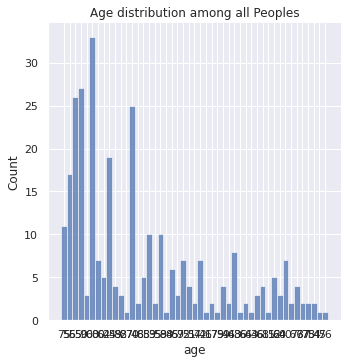

In [77]:
df_pandas = data.toPandas()

# fig = plt.figure(figsize=(10, 5))
sns.displot(df_pandas["age"]);
plt.title("Age distribution among all Peoples")

Text(0.5, 1.0, 'Age distribution among all Peoples')

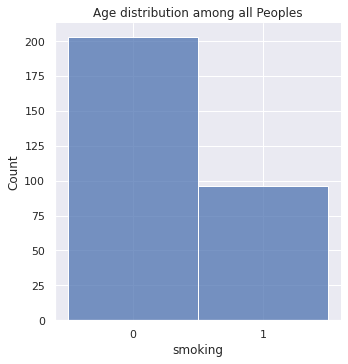

In [79]:

sns.displot(df_pandas["smoking"]);
plt.title("Smoking distribution among all Peoples")

**Checking for Missin Values**

In [81]:
data.select([f.count(f.when(f.isnan(c) | f.col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|
+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|  0|      0|                       0|       0|                0|                  0|        0|               0|           0|  0|      0|   0|          0|
+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+

